# IGRF

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import functions as func


gauss_coeffs = np.genfromtxt('../models/IGRF/igrf_tab.txt', skip_header=1, usecols=(2,3))


lat = np.linspace(89,-89,100)
lon = np.linspace(0,360,200)

LON, LAT = np.meshgrid(lon, lat)

Br, Bth, Bph = func.evaluate_B(gauss_coeffs, lat, lon)

ax = func.setup_map_figure()
im, cbar = func.plot_contourf(ax,LAT,LON,Br, 40, cmap='jet')
cbar.set_label('Br [nT]')
plt.show()

ModuleNotFoundError: No module named 'shapely'

In [2]:
for i in [False,True]:

    dipole_rate, pol_ke, tor_ke = func.dipole_bound(14, 13, gauss_coeffs, 13, toroidal_only=i, save_files=True)

    print('Axial Dipole ROC: {:.1f} nT/year\n'.format(dipole_rate))

    print('Optimised Flow Vectors (toroidal only: {})'.format(i))
    lons,lats,u,v = func.read_vectors()
    ax = func.setup_map_figure()
    im, cbar = func.plot_vectors(ax,lats,lons,u,v,density=3)
    plt.show()

Axial Dipole ROC: 221.4 nT/year

Optimised Flow Vectors (toroidal only: False)


# Varying Truncation Degree of IGFR

Calculating for degree 13

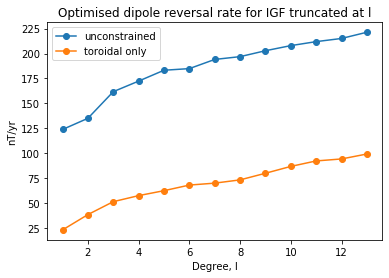

In [6]:
results = np.zeros((13,2))
for i in range(1,14):

    print('\rCalculating for degree {}'.format(i), end='', flush=True)

    dipole_rate, pol_ke, tor_ke = func.dipole_bound(14,i, gauss_coeffs, 13, toroidal_only=False, save_files=False)

    results[i-1,0] = dipole_rate

    dipole_rate_tor, pol_ke, tor_ke = func.dipole_bound(14,i, gauss_coeffs, 13, toroidal_only=True, save_files=False)

    results[i-1,1] = dipole_rate_tor


plt.plot(np.arange(1,14),results[:,0],'o-',label='unconstrained')
plt.plot(np.arange(1,14),results[:,1],'o-',label='toroidal only')
plt.xlabel('Degree, l')
plt.ylabel('nT/yr')
plt.title('Optimised dipole reversal rate for IGF truncated at l')
plt.legend()
plt.show()
